# Week 4 - Models and Experimentation

## Step 1 Training a model

For the purposes of this demo, we will be using this [adapted demo](https://www.datacamp.com/tutorial/xgboost-in-python) and training an XGBoost model, and then doing some experimentation and hyperparameter tuning.


If running this notebook locally, use the following steps to create virtual environment:
- Don't use past python 3.10
- To create virtual environment use "venv"

`python -m venv NAME`

- Try to avoid anaconda, poetry or similar package management platforms
- To install a package use pip

`python -m pip install <package-name>`

- once you are done working with this virtual environment, deactivate it with `deactivate`

### Install packages

In [ ]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Import data

We will be using Diamonds dataset imported from Seaborn. It is also available on [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds).

Read about the features by following the link. We will be predicting the price of diamonds.

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
diamonds.shape

(53940, 10)

In [ ]:
X,y = diamonds.drop('price', axis=1), diamonds[['price']]

# For the cut, color and clarity use pandas category to enable XGBoost ability to deal with categorical data.

X['cut'] = X['cut'].astype('category')
X['color'] = X['color'].astype('category')
X['clarity'] = X['clarity'].astype('category')

### Split the data and train a model

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [ ]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain,
   num_boost_round=n,
)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:11:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [ ]:
# Define evaluation metrics - Root Mean Squared Error

predictions = model.predict(dtest)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

RMSE: 532.8838153117543


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:11:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


### Incorporate validation

In [ ]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 100

# Create the validation set
evals = [(dtrain, "train"), (dtest, "validation")]

In [ ]:
evals = [(dtrain, "train"), (dtest, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10,
)

[0]	train-rmse:2859.49097	validation-rmse:2851.62630
[10]	train-rmse:550.99470	validation-rmse:571.16640
[20]	train-rmse:491.51435	validation-rmse:544.08058
[30]	train-rmse:464.38845	validation-rmse:537.01895


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:11:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[40]	train-rmse:445.99106	validation-rmse:533.85127
[50]	train-rmse:430.36010	validation-rmse:532.90320
[60]	train-rmse:418.87898	validation-rmse:533.04629
[70]	train-rmse:409.66247	validation-rmse:533.58046
[80]	train-rmse:397.34048	validation-rmse:534.31963
[90]	train-rmse:389.94294	validation-rmse:532.61946
[99]	train-rmse:377.70831	validation-rmse:532.88383


In [ ]:
# Incorporate early stopping
n = 10000


model = xgb.train(
   params=params,
   dtrain=dtrain,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50,
   # Activate early stopping
   early_stopping_rounds=50
)

[0]	train-rmse:2859.49097	validation-rmse:2851.62630


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:11:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[50]	train-rmse:430.36010	validation-rmse:532.90320
[100]	train-rmse:377.56825	validation-rmse:532.79980
[103]	train-rmse:375.44970	validation-rmse:532.50220


In [ ]:
# Cross-validation

params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 1000

results = xgb.cv(
   params, dtrain,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:11:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [ ]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2861.153015,8.266765,2861.773555,36.937516
1,2081.378004,5.534608,2084.973481,32.064109
2,1545.361682,3.287745,1553.681211,31.059209
3,1182.364236,3.585787,1192.464771,26.157805
4,941.828819,2.971779,958.467497,23.613538


In [ ]:
best_rmse = results['test-rmse-mean'].min()

best_rmse

549.1039652582465

## Start W&B


- Login into your W&B profile using the code below
- Alternatively you can set environment variables. There are several env variables which you can set to change the behavior of W&B logging. The most important are:
    - WANDB_API_KEY - find this in your "Settings" section under your profile
    - WANDB_BASE_URL - this is the url of the W&B server

- Find your API Token in "Profile" -> "Setttings" in the W&B App



In [ ]:
# Log in to your W&B account
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# TO DO
# Start experiment tracking with W&B
# Do at least 5 experiments with various hyperparameters
# Choose any method for hyperparameter tuning: grid search, random search, bayesian search
# Describe your findings and what you see

In [ ]:
# Initialize a new wandb run
wandb.init(project='Practicum_HW2_Final', entity='sailajabobburi2024')

wandb: Currently logged in as: sailajabobburi2024. Use `wandb login --relogin` to force relogin


In [ ]:
sweep_config = {
    'method': 'grid',
    'metric': {
        'name': 'reg:squarederror',
        'goal': 'minimize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.1, 0.01, 0.001]
        },
        'max_depth': {
            'values': [3, 5, 10]
        },
        'n_estimators': {
            'values': [50, 100, 200]
        }
    }
}


In [ ]:

sweep_id = wandb.sweep(sweep_config, project="Practicum_HW_WB", entity='sailajabobburi2024')

def train():
    # Initialize a W&B run
    run = wandb.init()

    # Access the hyperparameters through wandb.config
    config = wandb.config

    # Define the model
    params = {
        'objective': 'reg:squarederror',
        'learning_rate': config.learning_rate,
        'max_depth': int(config.max_depth),
        'n_estimators': int(config.n_estimators),
        'eval_metric': 'rmse'
    }

    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=config.n_estimators)

    # Evaluate the model
    predictions = model.predict(dtest)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Log metrics
    wandb.log({'rmse': rmse})

    run.finish()

Create sweep with ID: kf22zqjh
Sweep URL: https://wandb.ai/sailajabobburi2024/Practicum_HW_WB/sweeps/kf22zqjh


In [ ]:
wandb.agent(sweep_id, train)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: y5lnvoxb with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	n_estimators: 50


rmse,▁
rmse,712.41742


wandb: Agent Starting Run: fau5baiq with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	n_estimators: 100


rmse,▁
rmse,611.56654


wandb: Agent Starting Run: klh7h3lf with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	n_estimators: 200


rmse,▁
rmse,579.33461


wandb: Agent Starting Run: vsoowl8l with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	n_estimators: 50


rmse,▁
rmse,559.67809


wandb: Agent Starting Run: t370ygh4 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	n_estimators: 100


rmse,▁
rmse,536.95996


wandb: Agent Starting Run: y4dvano4 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	n_estimators: 200


rmse,▁
rmse,531.19823


wandb: Agent Starting Run: 4y1etfo7 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10
wandb: 	n_estimators: 50


rmse,▁
rmse,536.08837


wandb: Agent Starting Run: g74njkip with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10
wandb: 	n_estimators: 100


rmse,▁
rmse,541.94638


wandb: Agent Starting Run: pwnabxax with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 10
wandb: 	n_estimators: 200


rmse,▁
rmse,547.25915


wandb: Agent Starting Run: h6gx68sa with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	n_estimators: 50


rmse,▁
rmse,2612.56634


wandb: Agent Starting Run: yuh3jnp8 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	n_estimators: 100


rmse,▁
rmse,1831.91203


wandb: Agent Starting Run: tbj8kn5u with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	n_estimators: 200


rmse,▁
rmse,1126.62198


wandb: Agent Starting Run: mfzrddwl with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	n_estimators: 50


rmse,▁
rmse,2518.54334


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8hdfcfyo with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	n_estimators: 100


rmse,▁
rmse,1651.71841


wandb: Agent Starting Run: 4kw84t38 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	n_estimators: 200


rmse,▁
rmse,866.4245


wandb: Agent Starting Run: b56sy6ew with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10
wandb: 	n_estimators: 50


rmse,▁
rmse,2468.13645


wandb: Agent Starting Run: n320k2s4 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10
wandb: 	n_estimators: 100


rmse,▁
rmse,1569.13835


wandb: Agent Starting Run: g74jkymo with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 10
wandb: 	n_estimators: 200


rmse,▁
rmse,773.95576


wandb: Agent Starting Run: ctstqv6k with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 3
wandb: 	n_estimators: 50


rmse,▁
rmse,3813.61584


wandb: Agent Starting Run: 13vxinu9 with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 3
wandb: 	n_estimators: 100


rmse,▁
rmse,3649.3956


wandb: Agent Starting Run: 4k1wwv3l with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 3
wandb: 	n_estimators: 200


rmse,▁
rmse,3347.28015


wandb: Agent Starting Run: 9jbg60pk with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 5
wandb: 	n_estimators: 50


rmse,▁
rmse,3804.86971


wandb: Agent Starting Run: hdif2yiq with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 5
wandb: 	n_estimators: 100


rmse,▁
rmse,3631.27801


wandb: Agent Starting Run: nfzn1204 with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 5
wandb: 	n_estimators: 200


rmse,▁
rmse,3309.49496


wandb: Agent Starting Run: wjneh7uu with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 10
wandb: 	n_estimators: 50


rmse,▁
rmse,3798.67156


wandb: Agent Starting Run: m53gxy4b with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 10
wandb: 	n_estimators: 100


rmse,▁
rmse,3619.55827


wandb: Agent Starting Run: ak3yv0m0 with config:
wandb: 	learning_rate: 0.001
wandb: 	max_depth: 10
wandb: 	n_estimators: 200


rmse,▁
rmse,3287.59399


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x793e9149fa90>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

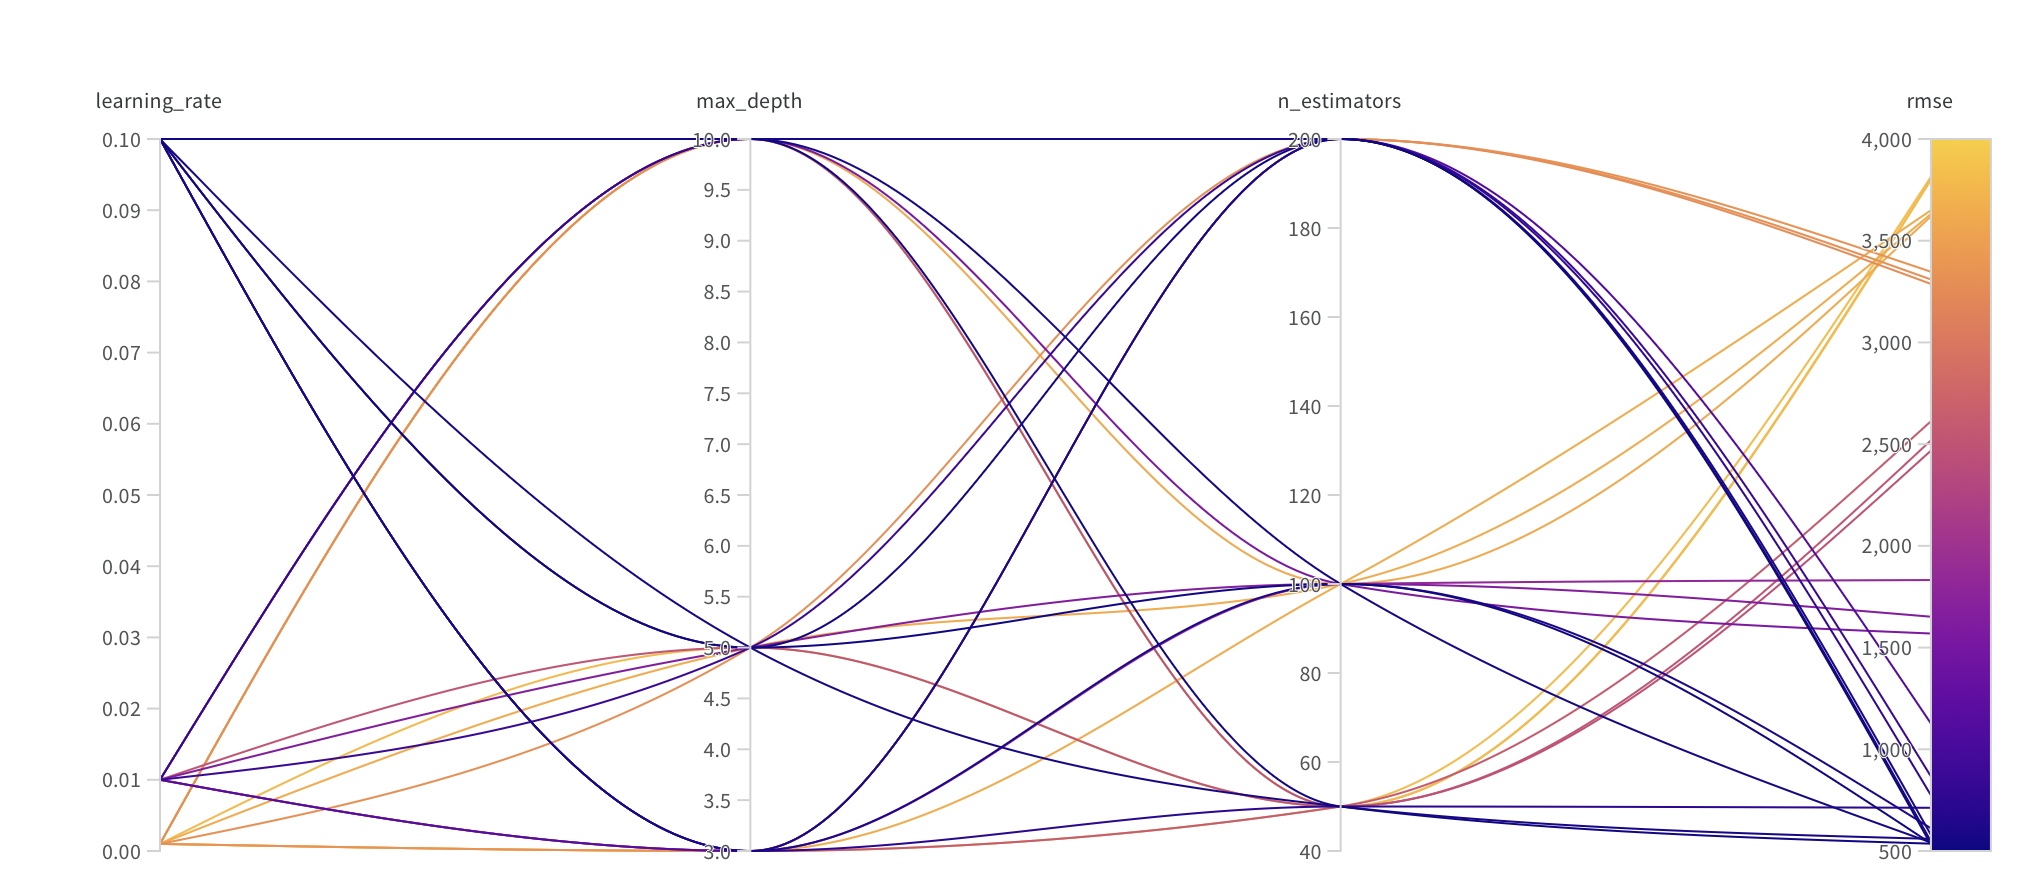

## Experiment Brief
The experiment involves tuning three hyperparameters for a machine learning model: `learning_rate`, `max_depth`, and `n_estimators`. The potential values for these hyperparameters are as follows:

- `learning_rate`: [0.1, 0.01, 0.001]
- `max_depth`: [3, 5, 10]
- `n_estimators`: [50, 100, 200]

The model's performance for various combinations of these hyperparameters is assessed using the RMSE metric.

## Analysis

### Learning Rate (0.001 to 0.10)
- Lower learning rates (**close to 0.001**) correspond to a **wide range of RMSE values**, indicating inconsistent performance.
- An increase in the learning rate generally leads to **decreased RMSE**, with a sweet spot **around 0.05 to 0.1**.
- **Higher learning rates** tend to result in **increased RMSE**, suggesting that large steps could cause the model to overshoot the optimal solution.

### Max Depth (3 to 10)
- **Middle values** of `max_depth` are associated with **lower RMSE values**, implying that a moderate tree depth can help avoid both underfitting and overfitting.
- **Shallow trees** (depth close to 3) tend to perform poorly, likely due to **insufficient complexity**.
- **Deep trees** (depth close to 10) do not consistently perform well, which may indicate a **risk of overfitting**.

### N_Estimators (40 to 200)
- Both **very low and very high numbers of estimators** correspond to **higher RMSE values**.
- A **mid-range** number of estimators seems to have **lower RMSE values** (cooler colors on the plot), suggesting an optimal range for the number of trees.

## Optimal Parameters from the Experiment
Based on the analysis of the RMSE across different hyperparameter values, the optimal set of parameters within the tested ranges would likely be:

- `learning_rate`: 0.1
- `max_depth`: 5
- `n_estimators`: 100

These values are inferred to strike a balance between underfitting and overfitting, while allowing for efficient learning and generalization.
